# Introduction
Decision trees are a powerful, and popular supervised machine learning technique used for both classification, and regression tasks. They are widely used for interpretability, ease of implementation, and ability to handle various data types.

A decision tree resembeles a flowchart like structure with 3 main components,
1. Internal nodes: These represent questions, or test applied to a specific feature of the data.
2. Branches: These represent the outcome of the test at an internal node, leading to different parts of the tree.
3. Leaf nodes: These represent the final decision or prediction made by the tree.

Advantages of decision trees,
- Interpretability: Decision trees are easy to understand and interpret. The branches can easily be followed to understand the logic behind the predictions.
- No feature scaling: Decision trees can handle both numerical and categorical features without the need for explicit feature scaling, which can be a challenge in other algorithms.
- Robust to outliers: Decision trees are relatively robust to outliers in the data compared to some other models.
- Can handle missing values: Techniques like splitting based on the presence or absence of a value can be used to handle missing data.

Disadvantages of decision trees,
- Prone to overfitting: If allowed to grow too deep, decision trees can become overly complex and start fitting the training data too closely, leading to poor performance on unseen data (overfitting). Techniques like pruning or setting a maximum depth can help mitigate this.
- High variance: Decision trees can be sensitive to small changes in the data, leading to potentially high variance in the model's predictions. Techniques like bagging or random forests can help reduce variance.
- Feature importance: While interpretable, understanding the exact contribution of each feature to the final decision can be challenging in complex trees.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (20, 5)

# Decision tree algorithm
1. Start with the entire dataset at the root node.
2. Choose the best splitting feature: This involves finding the feature that best separates the data into distinct groups based on the target variable (classification), or prediction of continuous value (regression). Techniques like information gain (IG), or gini impurity (GI) are used to evaluate the goodness of the split.
3. Split the data based on the chosen feature: Create branches for each possible outcome of the test at the internal node.
4. Recursively repeat step 2, and 3 for each branch until a stopping criteria is met. This criteria could be, reaching a certain level of purity (meaning all data points in a leaf node belong to the same class in classification or have similar target values in regression), or reaching the maximum depth defined for the tree, or having no more informative features to split on.

# Code implementation of decision tree for classification

In [3]:
df1 = pd.read_csv("employee_attrition_dataset/train.csv")
df2 = pd.read_csv("employee_attrition_dataset/test.csv")
df = pd.concat([df1, df2])
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [4]:
# missing values
df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [5]:
# duplicated
df.duplicated().sum()

np.int64(0)

In [6]:
df.shape

(74498, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74498 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents      7

In [8]:
# dropping "Employee ID" column
df.drop(columns = ["Employee ID"], inplace = True)
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [9]:
# statistical summary of numerical columns
df.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000
mean,38.529746,15.721603,7299.379514,0.832935,49.991584,1.650326,55.727456
std,12.083456,11.223744,2152.508566,0.995289,28.513611,1.553633,25.399349
min,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [10]:
# correlation matrix
df.corr(numeric_only = True)

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Age,1.000000,0.537318,-0.001750,0.000672,-0.004586,0.003689,0.236337
Years at Company,0.537318,1.000000,-0.005971,0.000939,-0.004835,0.004387,0.442580
Monthly Income,-0.001750,-0.005971,1.000000,0.005669,-0.001910,0.001507,-0.006911
Number of Promotions,0.000672,0.000939,0.005669,1.000000,-0.006833,-0.001459,0.005150
Distance from Home,-0.004586,-0.004835,-0.001910,-0.006833,1.000000,-0.000954,-0.005735
Number of Dependents,0.003689,0.004387,0.001507,-0.001459,-0.000954,1.000000,0.000422
Company Tenure,0.236337,0.442580,-0.006911,0.005150,-0.005735,0.000422,1.000000


In [11]:
# label encoding the binary columns
binary_columns = [i for i in df.columns if df[i].dtype not in [int, float] and df[i].nunique() == 2]
binary_columns

['Gender',
 'Overtime',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Attrition']

In [12]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(dataframe, column):
    labelencoder = LabelEncoder()
    dataframe[column] = labelencoder.fit_transform(dataframe[column])
    return dataframe

In [13]:
for i in binary_columns:
    df = label_encoder(df, i)

df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,Education,5390,Excellent,Medium,Average,2,0,22,Associate Degree,Married,0,Mid,Medium,89,0,0,0,Excellent,Medium,1
1,59,0,4,Media,5534,Poor,High,Low,3,0,21,Master’s Degree,Divorced,3,Mid,Medium,21,0,0,0,Fair,Low,1
2,24,0,10,Healthcare,8159,Good,High,Low,0,0,11,Bachelor’s Degree,Married,3,Mid,Medium,74,0,0,0,Poor,Low,1
3,36,0,7,Education,3989,Good,High,High,1,0,27,High School,Single,2,Mid,Small,50,1,0,0,Good,Medium,1
4,56,1,41,Education,4821,Fair,Very High,Average,0,1,71,High School,Divorced,0,Senior,Medium,68,0,0,0,Fair,Medium,1


In [14]:
# one-hot encoding the categorical columns
ohe_columns = [i for i in df.columns if 10 >= df[i].nunique() > 2]
ohe_columns

['Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Number of Promotions',
 'Education Level',
 'Marital Status',
 'Number of Dependents',
 'Job Level',
 'Company Size',
 'Company Reputation',
 'Employee Recognition']

In [15]:
def one_hot_encoder(dataframe, categorical_columns, drop_first = True):
    dataframe = pd.get_dummies(dataframe, columns = categorical_columns, drop_first=drop_first)
    return dataframe

In [16]:
df = one_hot_encoder(df, ohe_columns, drop_first=True)
df.head()

,Age,Gender,Years at Company,Monthly Income,Overtime,Distance from Home,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Attrition,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,Number of Promotions_1,Number of Promotions_2,Number of Promotions_3,Number of Promotions_4,Education Level_Bachelor’s Degree,Education Level_High School,Education Level_Master’s Degree,Education Level_PhD,Marital Status_Married,Marital Status_Single,Number of Dependents_1,Number of Dependents_2,Number of Dependents_3,Number of Dependents_4,Number of Dependents_5,Number of Dependents_6,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,31,1,19,5390,0,22,89,0,0,0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False
1,59,0,4,5534,0,21,21,0,0,0,1,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False
2,24,0,10,8159,0,11,74,0,0,0,1,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False
3,36,0,7,3989,0,27,50,1,0,0,1,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False
4,56,1,41,4821,1,71,68,0,0,0,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False


In [17]:
df.shape

(74498, 50)

In [18]:
# splitting the train and test dataset
from sklearn.model_selection import train_test_split

x = df.drop(columns = ["Attrition"])
y = df["Attrition"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((59598, 49), (14900, 49), (59598,), (14900,))

In [20]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
# training the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy", max_depth = 10)
model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [22]:
# predicting
y_pred = model.predict(x_test_scaled)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [23]:
model.score(x_train_scaled, y_train)

0.751048692909158

In [24]:
model.score(x_test_scaled, y_test)

0.7343624161073825

# Visualizing decision trees
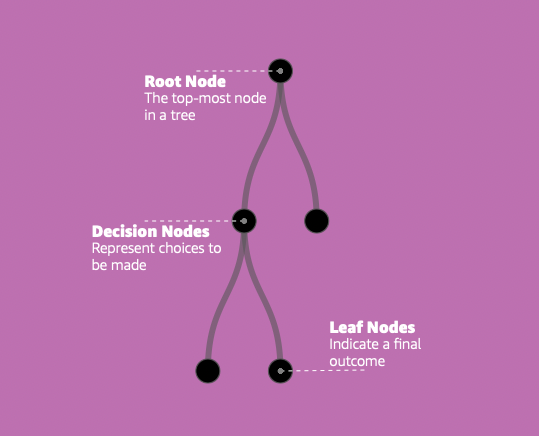

- The first node is called as root node.
- The nodes that are not split further are class as leaf nodes.
- The nodes in between the root node, and the leaf nodes are called as internal nodes, or decision nodes.
- The decision boundaries in a decision tree are axis parallel. Meaning, a node cannot be created that splits the data linearly, or polynomially, or logistically.
- Pure node, or homogenous nodes occur when there is only one class present as a result of a lot of splitting.

[Text(0.5520629285014691, 0.9545454545454546, 'x[32] <= 0.5\nentropy = 0.998\nsamples = 59598\nvalue = [28274, 31324]'),
 Text(0.3163106023506366, 0.8636363636363636, 'x[40] <= 0.5\nentropy = 0.952\nsamples = 38833\nvalue = [14411.0, 24422.0]'),
 Text(0.43418676542605283, 0.9090909090909092, 'True  '),
 Text(0.1858931194906954, 0.7727272727272727, 'x[7] <= 0.5\nentropy = 0.988\nsamples = 30900\nvalue = [13487, 17413]'),
 Text(0.10531953966699314, 0.6818181818181818, 'x[39] <= 0.5\nentropy = 1.0\nsamples = 25060\nvalue = [12382, 12678]'),
 Text(0.05435847208619001, 0.5909090909090909, 'x[14] <= 0.5\nentropy = 0.976\nsamples = 12548\nvalue = [7405, 5143]'),
 Text(0.028648383937316356, 0.5, 'x[16] <= 0.5\nentropy = 0.995\nsamples = 8700\nvalue = [4725, 3975]'),
 Text(0.01444662095984329, 0.4090909090909091, 'x[25] <= 0.5\nentropy = 1.0\nsamples = 6915\nvalue = [3409.0, 3506.0]'),
 Text(0.007835455435847209, 0.3181818181818182, 'x[30] <= 0.5\nentropy = 1.0\nsamples = 6567\nvalue = [3340, 3

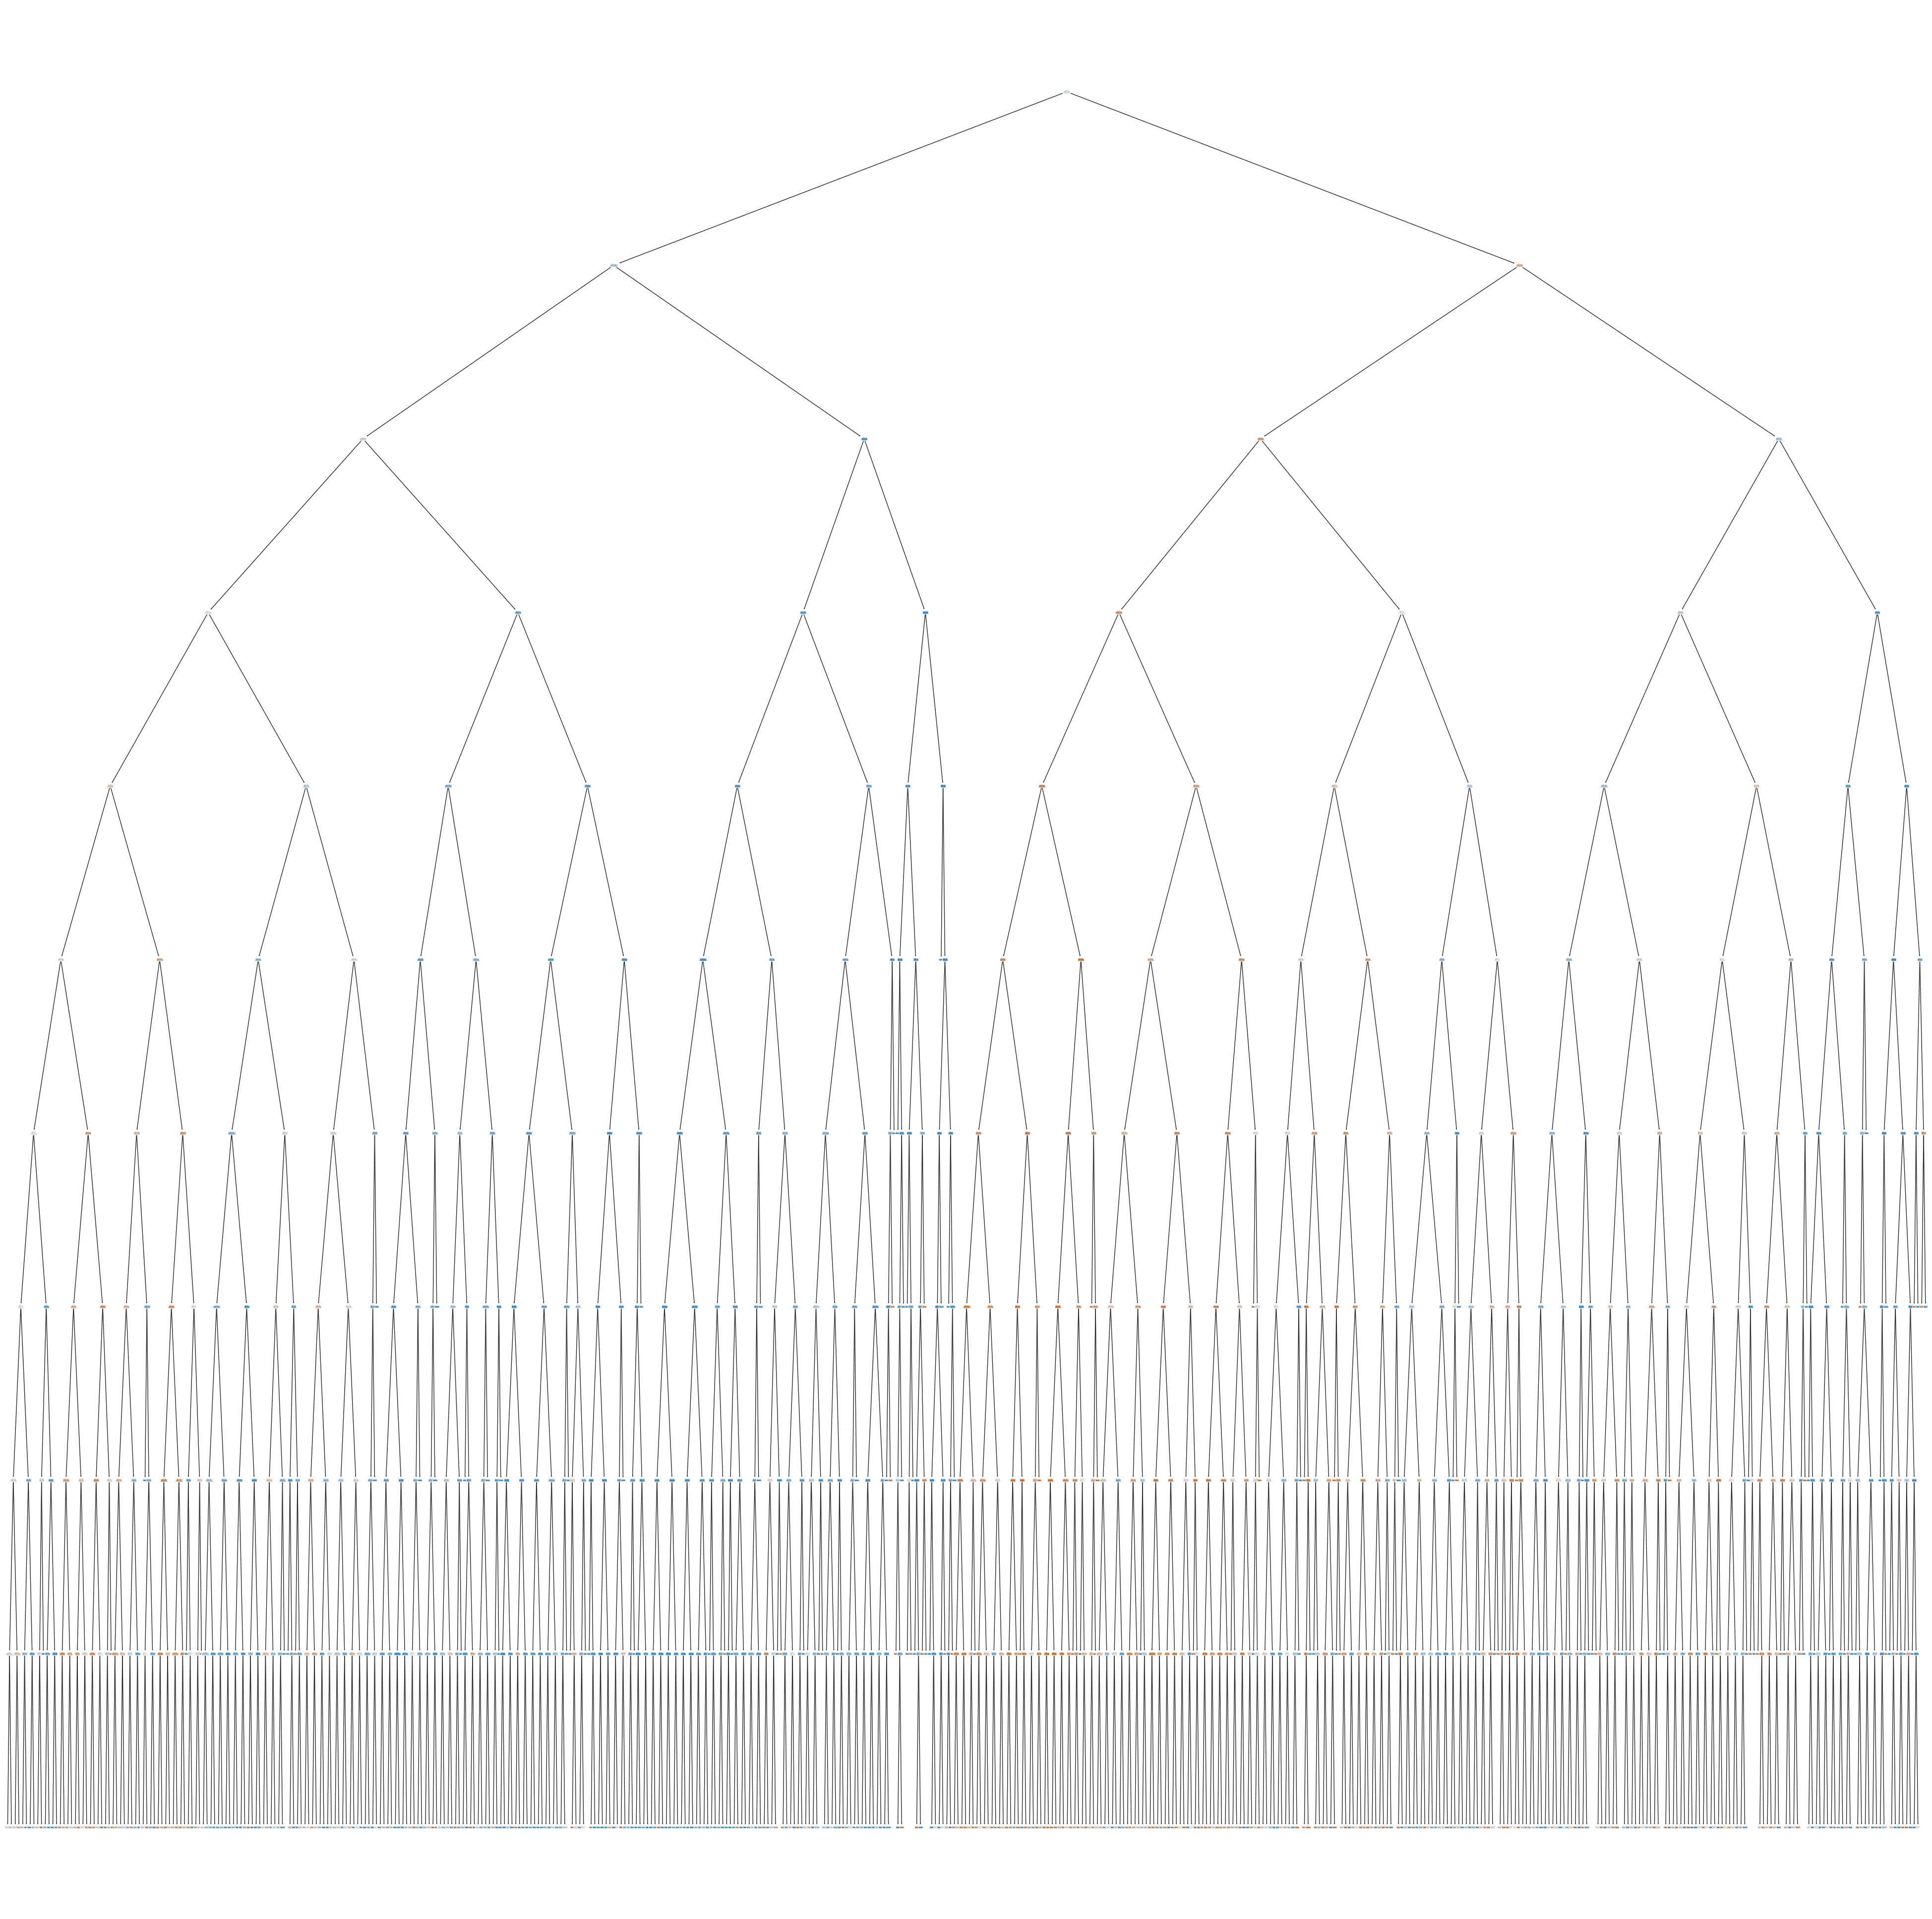

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize = (50, 50))
plot_tree(model, filled = True)

[Text(0.5, 0.9, 'x[32] <= 0.5\nentropy = 0.998\nsamples = 59598\nvalue = [28274, 31324]'),
 Text(0.25, 0.7, 'x[40] <= 0.5\nentropy = 0.952\nsamples = 38833\nvalue = [14411.0, 24422.0]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= 0.5\nentropy = 0.988\nsamples = 30900\nvalue = [13487, 17413]'),
 Text(0.0625, 0.3, 'x[39] <= 0.5\nentropy = 1.0\nsamples = 25060\nvalue = [12382, 12678]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'x[39] <= 0.5\nentropy = 0.7\nsamples = 5840\nvalue = [1105, 4735]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'x[7] <= 0.5\nentropy = 0.519\nsamples = 7933\nvalue = [924, 7009]'),
 Text(0.3125, 0.3, 'x[14] <= 0.5\nentropy = 0.585\nsamples = 6437\nvalue = [904, 5533]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'x[0] <= 0.159\nentropy = 0.102\nsamples = 1496\nvalue = [20, 1476]'),
 Text(0.40625, 

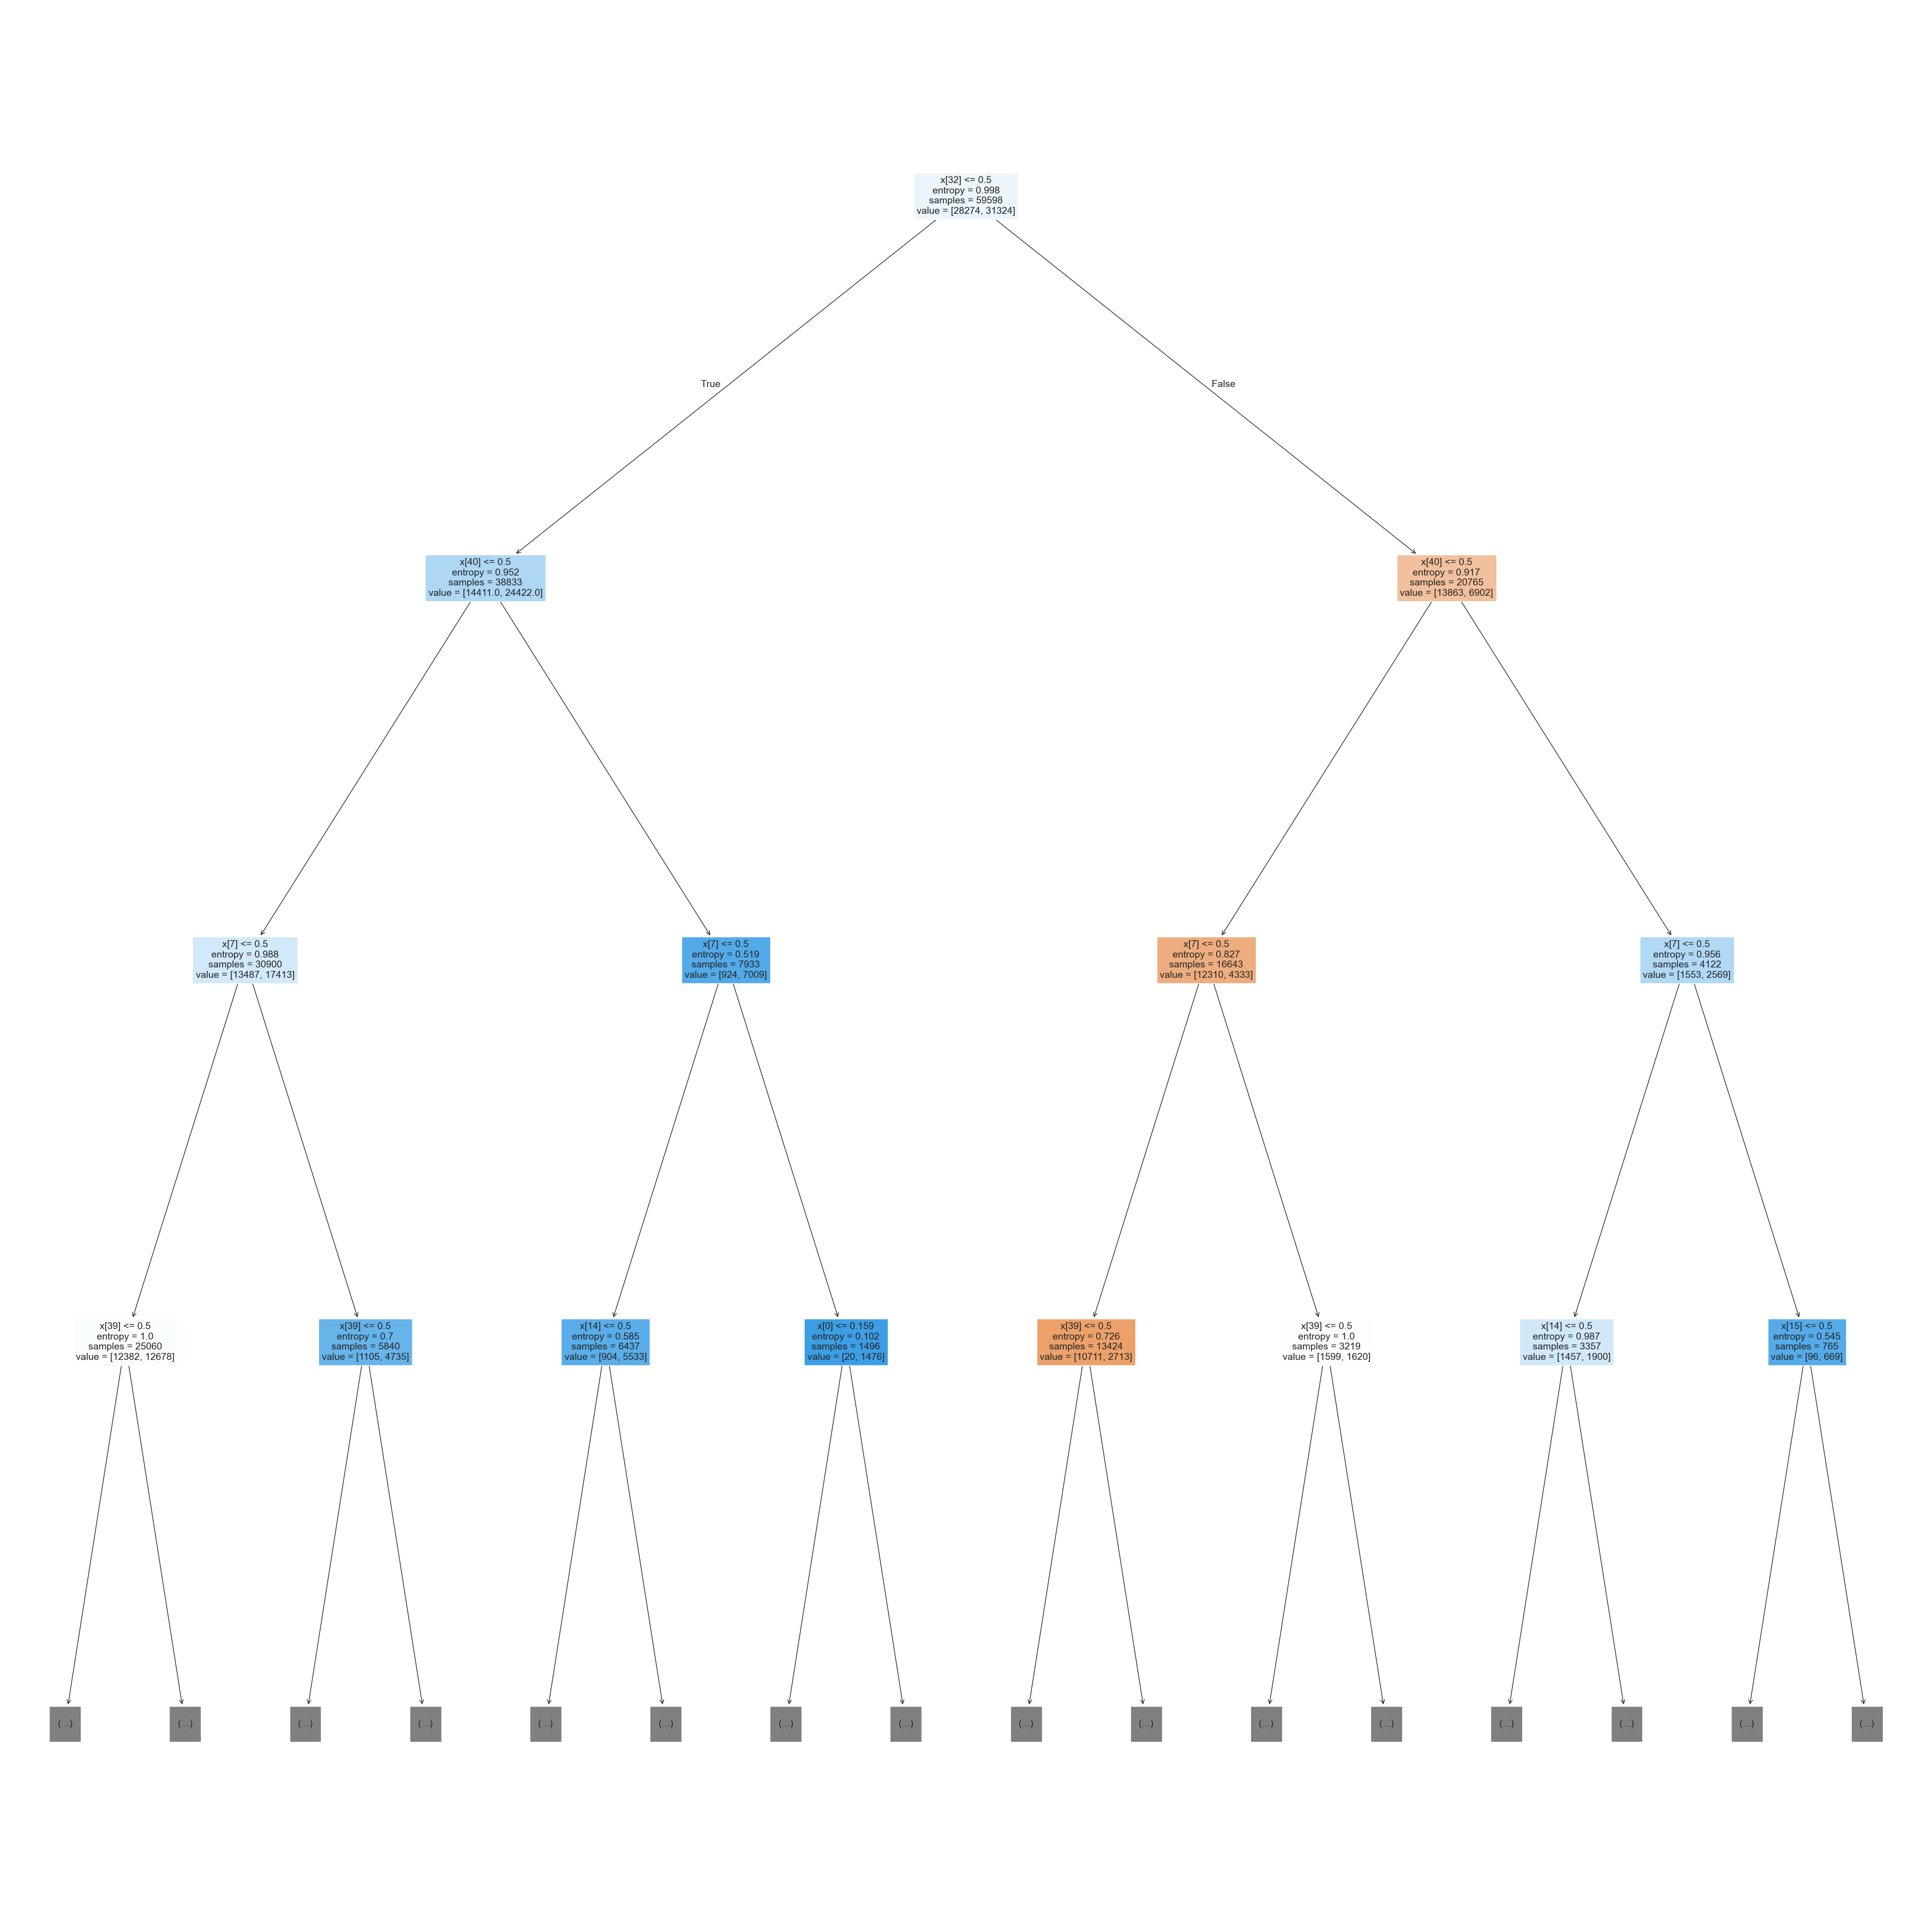

In [26]:
plt.figure(figsize = (50, 50))
plot_tree(model, filled = True, max_depth = 3)

# A better way to visualize the full tree

In [27]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

# create a list of all the columns
features = list(x_train.columns)
# ensure that the target variable "Attrition" is not there in the features
print(features)

['Age', 'Gender', 'Years at Company', 'Monthly Income', 'Overtime', 'Distance from Home', 'Company Tenure', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Job Role_Finance', 'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology', 'Work-Life Balance_Fair', 'Work-Life Balance_Good', 'Work-Life Balance_Poor', 'Job Satisfaction_Low', 'Job Satisfaction_Medium', 'Job Satisfaction_Very High', 'Performance Rating_Below Average', 'Performance Rating_High', 'Performance Rating_Low', 'Number of Promotions_1', 'Number of Promotions_2', 'Number of Promotions_3', 'Number of Promotions_4', 'Education Level_Bachelor’s Degree', 'Education Level_High School', 'Education Level_Master’s Degree', 'Education Level_PhD', 'Marital Status_Married', 'Marital Status_Single', 'Number of Dependents_1', 'Number of Dependents_2', 'Number of Dependents_3', 'Number of Dependents_4', 'Number of Dependents_5', 'Number of Dependents_6', 'Job Level_Mid', 'Job Level_Senior', 'Company Size_M

In [28]:
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, feature_names = features, filled = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

FileNotFoundError: [Errno 2] "dot" not found in path.

# How to decide what feature to split on, and what threshold to split on?
- Say that there are 200 data points, 100 positive and 100 negative. Also, say that there are d features.
- Say that 2 features j and k are selected out of the d features. Also say that 2 thresholds $\tau_j$ and $\tau_k$ are chosen.
- Consider case 1, where the feature j, and the threshold $\tau_j$ is splitting the 200 data points into, 10 positives and 90 negatives if the decision was yes, and 90 positives and 10 negatives if the decision was no.
- Consider case 2, where the feature k, and the threshold $\tau_k$ is splitting the 200 data points into, 60 positives and 40 negatives if the decision was yes, and 40 positives and 60 negatives if the decision was no.
- The better combination of feature, and threshold that should be selected is case 1. Why? Because, this choice is resulting in a purer node, or better segregation.

# How to measure purity (Entropy)?
There is no direct way of measutring purity. But there is a way to measure impurity using the concept of entropy. Entropy essentially measures the randomness, or uncertainity associated with classifying a data point at a node.

### Calculating entropy
1. The number of classes, k, present in the dataset are considered.
2. For each class i, the probability $P(class_i)$ is calculated by dividing the number of data points belonging to that class by the total number of data points in the node n.
3. The entropy H(X) is calculated using the formula, $H(class_k) = - \sum_{i = 1}^{k}P(class_k)*\log_2(P(class_k))$. The logarithm is typically taken in base 2 (logarithm with base 2), resulting in units of bits.

### Interpreting entropy
- A higher entropy (closer to 1) indicates a more impure node. The probabilities of different classes are closer, making it harder to predict the class label for a new data point.
- A lower entropy (closer to 0) indicates a purer node. The data points in the node predominantly belong to one class, leading to higher confidence in predicting the class label.

# How to pick the best decision when there is choice between two? Choosing the best split: Information Gain (IG)
The drop from impurity at root level and the impurity after the split is called as information gain. It preferred to have low impurity, and high information gain (IG).

When presented with multiple potential splits (e.g., gender or age), decision trees use information gain to determine the split that leads to the most significant reduction in impurity.

Here's the process,
1. Calculate entropy for child nodes: After splitting the root node (based on feature-threshold combination), calculate the entropy for each child node. This reflects the impurity within each child node.
2. Weighted average impurity: Since each child node has a different number of data points ($n_1$ and $n_2$), a simple average of their entropies wouldn't be ideal. Weighted average is used based on the proportion of data points in each child node relative to the total number of data points (n) at the parent node. $\text{Impurity of this decision} = (\frac{n1}{n} * Entropy(C1))+(\frac{n2}{n} * Entropy(C2))$. This weighted average represents the overall impurity resulting from the chosen split.
3. Information gain calculation: It is intended to see how much the split reduces the uncertainity (entropy) compared to the parent node. $\text{Information Gain} = Entropy(Parent) - Entropy(Child)$, $\text{Information Gain} = H(Parent) - H(Child)$.
4. Choosing the best split: The information gain for each potential split is evaluate (considering different features and thresholds). The split with the highest information gain is chosen as it leads to the most significant reduction in entropy, resulting in purer child nodes. Ideally, information gain should be positive, indicating a decrease in entropy after the split. Negative information gain suggests the split doesn't improve purity and might be discarded.
5. Iterating through features: The steps 1 to 4 are repeated for all the features ($f_1$ to $f_d$) and their possible thresholds. The feature-threshold combination with the highest information gain is chosen for splitting the node.

# Limitations of entropy
### Lot of calculations involve log
- Logarithm calculations: Entropy uses logarithms, which can be computationally expensive for large datasets, especially when dealing with many classes. The base of the logarithm (typically 2) also needs to be considered.
- Alternative to entropy: Gini impurity offers a simpler calculation without logarithms, making it computationally faster. It focuses on the probability of a randomly chosen sample being misclassified if labeled according to the most frequent class in that node.
- Comparing entropy and gini impurity:
    - Both metrics measure impurity (uncertainity) and reach their minimum (0) when there's perfect classification (all data points belong to the same class).
    - As the class distribution becomes more even (higher uncertainty), both values increase towards their respective maximums (1 for entropy and 0.5 for gini impurity).
- Choosing between entropy and gini impurity:
    - In general, there is no significant difference in performance between entropy and gini impurity for most datasets, especially when dealing with a low number of features.
    - Both can be considered hyperparameters that can be tuned to potentially improve model's performance.

### Challenges with splitting numerical features
- Categorical features have a limited number of possible values, making the task of splitting them pretty straightforward (e.g., Gender = Male/ Female).
- Numerical features have a continuous range of values, posing a challenge for splitting.
- Brute force approach for and its issues: Brute force involves considering every possible value in the feature as a potential threshold for splitting. This approach can be computationally expensive for large datasets with many numerical features (d features, n rows). For each feature, and each unique value in that feature, information gain would have to be calculated. This will lead to $n * d$ computations for just one level of split.
- Alternate approaches:
    1. Binning:
        - This technique involves dividing the continuous range of the numerical involves dividing the continuous range of the numerical feature into discrete bins (k bins).
        - Information gain for each possible bin split can be calculated, and the one with the highest IG can be choosen.
        - Binning reduces computation compared to brute force but introduces an additional byperparameter (number of bins) that needs experimentation.
    2. Random splitting:
        - This approach involves selecting k random thresholds within the feature's range and calculating the IG for each split.
        - While faster than brute force, it might not always find the optimal split and might lead to suboptimal performance in some cases.

# Pruning
Pruning is cutting unnecessary branches in the decision trees. It is done to prevent overfitting on train set. The hyperparameters associated with pruning are,
1. max_depth: Defines the depth of the tree.
2. min_sample_split: Defines the number of minimum data points required to split. For example, if it is set to 600, any node that contains data points lower than this will not be split.
3. min_sample_leaf: Defines the minimum number of data points every node should have after splitting.
4. max_leaf_nodes: Defines the maximum number of leaf nodes that a node can be split into.

# Impact of feature scaling on decision trees
In general, feature scaling has minimal impact on the performance of decision trees. Here's why,

### Decision trees and splitting
- Decision trees work by splitting the data based on a single feature at each node. The split point is chosen based on the feature value that best separates the classes.
- Decision trees do not rely on the absolute magnitude of the feature values, but rather on the relative ordering or distribution within each split.

### Impact of feature scaling
- Feature scaling techniques like standardization (z-score) or normalization can change the range and distribution of the features.
- However, for decision trees, this scaling doesn't significantly affect the order or ranking of the data points within each feature. As long as the relative ordering is preserved, the decision tree will likely choose the same split points regardless of scaling.

### When scaling might help
While scaling generally has minimal impact on decision tree's performance, there are a few situations where it might be beneficial,
- Distance based measures: If a decision tree algorithm that incorporates distance-based measures is being used (like some ensemble methods that include decision trees), scaling can be helpful to ensure all features contribute equally to the distance calculations.
- Numerical v. categorical features: If the data has a mix of numerical and categorical features, scaling the numerical features can help prevent them from dominating the categorical features during the splitting process.

# Building Decision Trees with categorical features

### One-hot encoding (OHE)
- This is the most common approach for handling categorical features with a reasonable number of categories.
- OHE creates a new binary feature for each category. The value is 1 for the corresponding category and 0 for all others.
- This allows the decision trees to split on these new binary features effectively.

### Challenges with many categories
- With 10,000 unique categories, creating 10,000 nodes in the tree would be computationally expensive and lead to a very slow model.
- OHE can also increase the dimensionality of the data significantly, impacting the training time and memory usage.

### Alternative approaches for many categories
1. Target encoding:
    - This technique replaces the category with some statistical summary of the target variable for that category.
    - Common examples include mean, median, or the encoding can be learned using more sophisticated models.
    - This reduces the number of features to the number of categories and avoids creating a separate node for each category.
2. Binning (for ordinal features):
    - This approach is applicable when the categories have a natural ordering (e.g., T-shirt sizes: S, M, L, XL, ...).
    - Similar categories are grouped into bins based on the order.
    - Then, either OHE can be used on the bins, or target encoding can be performed on the bins as a whole.
    - Binning reduces the number of features compared to OHE for all categories and leverages the ordinal relationship.

### Note
Binning is not suitable for non-ordinal categorical features where there's no inherent order among the categories (e.g., colors: red, blue, green, ...). In such cases, target encoding or other techniques like leave-one-out encoding or frequency encoding might be more appropriate.

### Choosing the right approach
The best approach for handling categorical features depends on the number of categories, their ordinal nature, and the specific dataset. Here's a general guideline,
- For a small number of categories, use OHE.
- For a large number of categories,
    - If the categories are ordinal, considering binning with OHE or target encoding on bins.
    - If the categories are non-ordinal, explore target encoding or other techniques like leave-one-out encoding or frequency encoding.

# Decision Trees for regression
Decision trees can be used for classification (predicting discrete categories) and regressio (predicting continuous values). The core principle remains the same, splitting the data based on features to create a tree structure that predicts the target variable.

### Classification v. regression
- Classification:
    - Uses metrics like entropy or gini impurity to measure the impurity of the node (how mixed the classes are).
    - Splits are chosen to maximize the reduction in impurity, leading to purer leaf nodes with dominant classes.
    - Prediction for a new data point involves calculating the probability of each class based on the path it takes through the tree and the class distribution in the final leaf node.
- Regression
    - Cannot directly calculate probabilities since the target variable is continuous.
    - Uses metrics like Mean Square Error (MSE) or Root Mean Squared Error (RMSE) to measure the difference between the predicted and actual values at a node.
    - Splits are chosen to minimize the difference in MSE/ RMSE between the parent node and the child nodes, resulting in leaves with more similar target values.
    - Prediction for a new data point involves calculating the average (mean) of the target variable in the final leaf node the data point falls into.

### Example
Consider a scenario with gender as a feature, and salary as the target variable.
- The tree might split data points based on gender (e.g., one node for males and another for females).
- Each node would then hold the average salary of the data points belonging to that category.
- A new data point classified as "femal" would be predicted to have a salary equal to the average salary in the femal leaf node.

### Overfitting
Overfitting is a bigger concern in regression trees. This is due to the following reasons,
- There's no inherent "stopping point" like class dominance in classification.
- The tree can potentially keep splitting until each leaf node has a single data point, perfectly fitting the training data but failing to generalize well.

### Inference speed
Decision trees are generally fast for inferene (prediction) because,
- The depth of the tree is typically limited, resulting in a relatively shallow structure.
- Traversing the tree to reach a leaf node requires only a series of comparisons based on feature values ($O(d)$, where d = depth).

# Ensemble

### Ensemble methods
- Concept: Ensemble methods combine predictions from multiple models (called base learners) to improve the overall performance compared to a single model.
- Benefits:
    - Reduced variance: By combining predictions from diverse models, ensembles can average out errors and reduce the model's variance, leading to more robust and generalizable predictions.
    - Increased accuracy: Ensemble methods can often achieve higher accuracy than a single model, especially when dealing with complex problems.

### Training multiple models
Different models are trained with potentially different parameters. This helps create diversity in the ensemble.

### Combining predictions
There are several ways to combine predictions from base learners,
1. Averaging: This is a simple approach where the average probability score (for classification) or prediction score (for regression) from all models is considered the final prediction.
2. Voting: This method works well for classification problems. Each model votes for a class, and the majority vote becomes the final prediction.
3. Weighted averaging: Models with better performance might be assigned higher weights.

### Types of ensemble techniques
There are 4 main ensemble techniques,
1. Bagging (Bootstrap aggregation):
    - This approach creates multiple models by training them on random subsets of the data (with replacement).
    - The final prediction is made by averaging the predictions from all models (regression) or voting (classification).
    - A popular example of bagging is Random Forest.
2. Boosting:
    - Boosting models are trained sequentially. Each model focuses on improving the errors made by the previous model.
    - This can be achieved by assigning higher weights to data points that the earlier models misclassified.
    - Examples of boosting include Gradient Boosting Decision Trees (GBDTs), XGBoost, AdaBoost, LightGBM, etc.
3. Stacking:
    - This approach involves creating a meta-model.
    - The base models are trained on the original data, and then their predictions are used as features to train a new model (the meta-model).
    - The final predictions are made by the meta-model.
    - Stacking is generally less common than bagging and boosting but can be powerful in specific situations.
4. Cascading:
    - Similar to stacking, cascading involves a series of models were the output of one model becomes the input for the next.
    - This is a more complex approach and less frequently used compared to other techniques.

### Importance in industry
- Bagging and boosting are widely used in industry due to their effectiveness and relative ease of implementation.
- Stacking and cascading are more niche techniques often used in research settings or Machine Learning competitions.

# Hyperparameters in decision trees
### Splitting criteria (splitting rule)
This parameter determines how the decision tree chooses the best feature and split point at each node for creating the tree structure. Common options include,
- Gini impurity (for classification): Measures the impurity or heterogeneity within a node. A lower gini value indicates a more homogenous node (better split).
- Entropy (for classification): Another measure of node impurity based on information theory.
- Mean square error (for regression): Measures the average squared difference between actual target values and the predicted values. Lower MSE indicates a better split for regression tasks.
The choice of the criteria depends on the kind of task (classification v. regression) and your preference for handling impurity.

### Maximum depth
This parameter controls the maximum allowable depth of the tree. Deeper trees can capture more complex relationships but are also more prone to overfitting. Here's how depth affects the tree,
- Shallow tree: Less complex, may underfit and miss important patterns in the data.
- Deep tree: More complex, can capture intricate details but might overfit the training data and performs poorly on unseen data.
Finding the right balance between capturing complexity and avoiding overfitting is crucial. Techniques like cross-validation can be used to evaluate performance with different maximum depth values.

### Minimum samples per split
This parameter sets the minimum number of data points required to split a node. Lower values can lead to overfitting as the tree might capture irrelevant details in smaller splits. Higher values can lead to underfitting if the tree becomes too shallow.

### Minimum samples per leaf
This parameter sets the minimum number of data points allowed in a final leaf node (terminal node). Lower values can lead to overfitting as the model might create overly specific leaf nodes with very few data points. Higher values can result in underfitting as the tree might merge similar data points into single leaves, potentially missing important distinctions.

### Maximum features per split
This parameter determines how many features are considered at each node for splitting. Considering all features at each split can lead to complex trees and overfitting. Considering a random subset of features at each split can help reduce overfitting and improve generalization.

### Tuning techniques
There is no single best set of hyperparameters for a decision tree. The optimal configuration depends on the dataset and the specific task. The following are some techniques for tuning hyperparameters,
1. Grid search: Evaluates a predefined grid of hyperparameter values and selects the combination leading to best performance.
2. Randomized search: Samples hyperparameter values randomly from a defined range and selects the best performing combination. This can be more efficient than grid search for large datasets.
3. Cross-validation: Splits the data into training and validation sets. Trains the model with different hyperparameter combination on the training data and evaluates performance on the validation set.

# Metrics to evaluate decision trees
### Classification metrics
- Accuracy: The most basic metric, representing the percentage of prediction that the model gets correct. It can be misleading, especially with imbalanced class distributions.
- Precision: Measures the proportion of positive predictions that were actually correct ($\frac{True \text{Positives}}{\text{True Positives} + \text{False Positives}}$). It reflects how good the model is at identifying actual positives and avoiding false alarms.
- Recall: Measures the proportion of actual positives that were identified by the model ($\frac{True \text{Positives}}{\text{True Positives} + \text{False Positives}}$). It reflects how good the model is at capturing all the relevant positive cases and not missing important ones.
- F1-Score: This is a harmonic mean of precision and recall, combining both metrics into a single score ($\frac{2 * (\text{Precision} * \text{Recall})}{(\text{Precision} + \text{Recall})}$). It provides a balance between the two and is useful when both precision and recall are important.
- ROC AUC (Area Under the ROC Curve): The receiver operating characteristic (ROC) curve is a visualization tool that plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds. The AUC (Area Under the Curve) summarizes the ROC curve, representing the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance. A higher AUC indicates better discrimination between classes.

### Regression metrics
- Mean Squared Error (MSE): This measures the average squared difference between the predicted values and the actual target values. Lower MSE indicates better model performance.
- Mean Absolute Error (MAE): This measures the average absolute difference between the predicted values and the actual target values. It can be less sensitive to outliers compared to MSE.
- R-Squared: This metric represents the proportion of variance in the target variable that can be explained by the model. It ranges from 0 to 1, with a higher value indicating a better fit.

### Choosing the right metric
The best metric for evaluating decision tree depends on the specific problem and the relative importance of different aspects of the model's performance.
- If overall classification accuracy is the primary concern, use accuracy.
- If the classes are imbalanced, consider using precision, recall, F1 score, or ROC AUC. These metrics provide a more nuanced view of the model's performance for each class.
- If the task involves continuous target variables (regression), use metrics like MSE, MAE, or R-Squared.

### Overfitting
Decision trees can be prone to overfitting, especially with very deep trees or a lack of proper regularization. Consider metrics like cross-validation error or pruning techniques to assess the model's ability to generalize to unseen data.

# Bias-variance trade-off in decision trees
Decision trees are known for their interpretability and flexibility, but they also face a trade-pff between bias and variance.

### Bias in decision trees
- Underfitting: High bias in decision trees occurs when the tree is too simple and lacks the complexity to capture the underlying patterns in the data effectively. This can lead to underfitting, where the model performs poorly on both the training data and unseen test data.
- Factors affecting bias:
    - Shallow tree depth: A shallow tree with limited splits might not capture intricate relationships within the data, leading to underfitting.
    - Greedy splitting: Decision trees make greedy choice at each split, optimizing for the current node instead of the overall tree structure. This can sometimes lead to suboptimal splits that hinder the model's ability to learn complex patterns.

### Variance in decision trees
- Overfitting: High variance in decision trees occurs when the tree becomes overly sensitive to the specific characteristics of the training data, including noise or irrelevant details. This can lead to overfitting, where the model performs well on the training data but fails to generalize to unseen test data.
- Factors affecting variance:
    - Deep tree depth: A very deep tree with many splits can become overly complex and start memorizing specific details from the training data, leading to overfitting.
    - Low minimum samples per split or leaf: If the minimim  number of data points allowed at each split or leaf node is too small, the tree can capture irrelevant noise or specific features present only in a small portion of the training data. This can lead to overfitting.

### Balancing bias and variance
The goal is to achieve a balance between bias and variance for optimal performance. The following are some strategies to consider,
- Tuning maximum depth: Experimenting with different maximum depth values can help control the complexity of the tree and avoid overfitting.
- Minimum samples parameter: Setting appropriate minimum samples per split and lead can prevent the tree from capturing noise or irrelevant details in the data.
- Pruning: Pruning techniques can help reduce the complexity of the tree by removing unnecessary branches that contribute little to the model's performance. This can help mitigate overfitting.
- Regularization techniques: Techniques like cost-complexity pruning penalize overly complex trees, encouraging simpler models with better generalization ability.

### Understanding the trade-off
- Decision trees v. other models: Compared to some models like linear regression (potentially high bias), decision trees tend to have a lower bias due to their flexibility. However, they can suffer more from variance if not properly regularized.
- Impact on interpretability: While pruning and other techniques can help reduce variance, they can also make the tree less interpretable. Its important to find a balance between model performance and interpretability depending on the specific needs.

# Underfitting and overfitting in decision trees
### Underfitting
- Scenario: The decision tree is too simple and fails to capture the underlying relationships between the features and the target variable.
- Symptoms:
    - Low accuracy on both the training and testing sets.
    - The tree might not have enough depth or complex splits to learn the true decision boundaries.
    - Coefficients associated with features might be close to zero, indicating they have little impact on the predictions.
- Causes:
    - Limited features: The model might lack the necessary features to represent the complexity of the data.
    - High regularization: Regularization techniques can prevent overfitting but if too strong, they might restrict the model's ability to learn the true relationships.
    - Shallow tree: A tree with limited depth might not be able to capture complex patterns in the data.

### Overfitting
- Scenario: The decision tree becomes too complex and memorizes the training data too well, failing to generalize to unseen data.
- Symptoms:
    - High accuracy on the training set but significantly lower accuracy on the testing set.
    - The tree might make very specific predictions based on patterns in the training data that don't hold ture for unseen data.
    - The tree might have many deep branches with complex splits.
- Causes:
    - Greedy splitting: Decision trees use a greedy approach to create splits, focusing on the best immediate separation rather than the long-term impact on the tree's generalizability.
    - Lack of regularization: Without mechanisms to control complexity, the tree can keep splitting until each leaf node has a single data point, perfectly fitting the training data but losing generalizability.

### Strategies to address underfitting and overfitting
- Pruning: As discussed, pruning techniques like setting a maximum depth or minimum samples per split can prevent the tree from becoming overly complex.
- Regularization: Techniques like L1 or L2 regularization penalizes the model for having complex structures, encouraging simpler trees and reducing overfitting. However, be cautious not to set regularization too high, as it can lead to underfitting.
- Data augmentation: Artificially increasing the size and diversity of the training data can help the model learn more generalizable patterns and reduce overfitting.
- Feature selection: Carefully choose the relevant features that contribute to the prediction task. Techniques like correlation analysis, chi-square tests, or feature importance scores can help identify important features. This can address both underfitting (by including relevant features) and overfitting (by excluding irrelevant features).
- Hyperparameter tuning: Experiment with different hyperparameters like maximum depth, minimum samples per split, and regularization strenght to find a balance between model complexity and performance.